<a href="https://colab.research.google.com/github/itayshntau/ex1_ItayShnaider_GuyMaoz_AsafBinyamini/blob/main/Assignment__I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1, Group 8. submitted by:  

Asaf Binyamini

Itay Shnaider

Guy Maoz




In [ ]:
import pandas as pd
import numpy as np
import math
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,  auc, roc_auc_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from typing import List, Dict
from random import choices
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

from math import sqrt
from scipy.stats import zscore
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


%matplotlib inline
warnings.filterwarnings('ignore')

# **Import the data**

In [ ]:
from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine learning/Assignments/Assignment_1/train.csv')
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


Before commencing the project, we have established a set of general methods to ensure an organized and efficient workflow. Firstly, we compiled a list of features based on our conclusions, which we intend to remove from the dataset. This allows us to work with a refined dataset in each stage, building upon the progress made thus far. Additionally, we have implemented a custom function naming convention, starting with 'pre_processing', to facilitate the testing of various data changes. This approach offers two primary advantages:
1. It grants us flexibility in exploring different methods and data processing techniques to determine the optimal approach.
2.  It simplifies the implementation of the data processing pipeline on the test dataset.

In [ ]:
features_to_remove =[]
# Create a function that append the feature only if it not there yet:
def append_to_features_to_remove(list, features):
    for feature in features:
        if feature not in list:
            list.append(feature)
    return list

Now we'll load the test data :)

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine learning/Assignments/Assignment_1/test.csv')
test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,10.317020,33.621,0.015615,127
1,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,3.502209,4.101,0.004489,13
2,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,25.945915,9.841,0.000000,163
3,2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,116.935908,29.521,0.004489,233
4,2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,120.824789,25.421,0.015615,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,2011-03-19 15:00:00,1,0,0,1,20.50,24.240,29,27.9993,44.665581,20.501,0.000242,313
2718,2012-01-08 16:00:00,1,0,0,1,16.40,20.455,37,19.9995,31.090380,16.401,0.000000,314
2719,2011-07-11 05:00:00,3,0,1,1,27.06,31.060,74,8.9981,1.075298,27.061,0.015615,26
2720,2011-07-16 08:00:00,3,0,0,1,27.06,31.060,65,11.0014,2.291586,27.061,0.004489,127


# **Exploring the data**


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    2722 non-null   object 
 1   season      2722 non-null   int64  
 2   holiday     2722 non-null   int64  
 3   workingday  2722 non-null   int64  
 4   weather     2722 non-null   int64  
 5   temp        2722 non-null   float64
 6   atemp       2722 non-null   float64
 7   humidity    2722 non-null   int64  
 8   windspeed   2722 non-null   float64
 9   pollution   2722 non-null   float64
 10  sunlight    2722 non-null   float64
 11  traffic     2722 non-null   float64
 12  count       2722 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 276.6+ KB


Insights from the info tables:
-	The train dataset comprises 8164 samples.
-	The test dataset comprises 2722 samples.
-	There are 11 features, predominantly numeric (float64 or int type), with 1 categorical (object type) feature requiring special attention during processing.

In [ ]:
missing_values = train_data.isnull().sum()
missing_values.sort_values(ascending=False) # Sorting the values with the most Nulls in the data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
pollution     0
sunlight      0
traffic       0
count         0
dtype: int64

Excellent. It can be seen that there are no missing values in the data.



## Count of Unique Values for Each Feature <br>
The code below is used to calculate the count of unique values for each feature in the train_data DataFrame. This helps us understand the variability and distinctness of values in each column.

In [ ]:
train_data.nunique().sort_values()

holiday          2
workingday       2
season           4
weather          4
traffic          4
windspeed       28
temp            49
sunlight        49
atemp           60
humidity        87
count          789
datetime      8164
pollution     8164
dtype: int64

We have a 2 binary features: holiday and workingday.

We can notice that 'season', 'weather' and 'traffic' are ordinal features with 4 different values.

## Sparse features exploration

We want to check the featured that are suspected to be sparse features. <br>
We'll count how many '0' values each of the continuous numeric (based on the data documentation file provided) features has and see if we can understand something about those features based on that.

In [ ]:
binary_features = ['holiday', 'workingday']
ordinal_features = ['season', 'weather','traffic']
train_data_numeric_features = train_data.drop(['datetime'] + binary_features + ordinal_features, axis=1).select_dtypes(include='number')
print(f"train_data numeric features are: {train_data_numeric_features.columns}")

print("counting zeros for each feature:")

for feature in train_data_numeric_features.columns:
    count_zero = len(train_data_numeric_features[train_data_numeric_features[feature] == 0])
    print(f"Number of samples with value 0 in {feature} feature: {count_zero}")

train_data numeric features are: Index(['temp', 'atemp', 'humidity', 'windspeed', 'pollution', 'sunlight',
       'count'],
      dtype='object')
counting zeros for each feature:
Number of samples with value 0 in temp feature: 0
Number of samples with value 0 in atemp feature: 0
Number of samples with value 0 in humidity feature: 15
Number of samples with value 0 in windspeed feature: 1000
Number of samples with value 0 in pollution feature: 0
Number of samples with value 0 in sunlight feature: 0
Number of samples with value 0 in count feature: 0


We observe that the majority of the features do not exhibit any zero values. The three features that do contain zeros have relatively low occurrences (25% or less) in relation to the total number of samples. Therefore, it is unlikely that we should categorize them as sparse features.

## Exploring Categorical Feature

We have a categorical feature in the data that requires attention - 'datetime.' Our understanding suggests that the exact date and time may not provide actionable insights. However, we aim to derive meaningful information from this feature. To achieve this, we will generate three new features - 'month', 'weekday', and 'hour.' The objective is to explore whether there is valuable information related to the target variable based on the month, weekday or time of the sample.

In [ ]:
def pre_process_convert_datetime(data):

    # Convert 'datetime' to pandas datetime format
    data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')

    # Extract month, weekday, and hour
    data['month'] = data['datetime'].dt.month
    data['weekday'] = data['datetime'].dt.dayofweek
    data['hour'] = data['datetime'].dt.hour

    # Move the 'count' variable to the rightmost position
    count_col = data.pop('count')
    data['count'] = count_col

    return data

In [ ]:
train_data = pre_process_convert_datetime(train_data)
features_to_remove = append_to_features_to_remove(features_to_remove, ['datetime'])

## Exploring Binary Features

### Holiday

Number of samples with value 1 in holiday feature: 240


holiday
0    0.970603
1    0.029397
dtype: float64

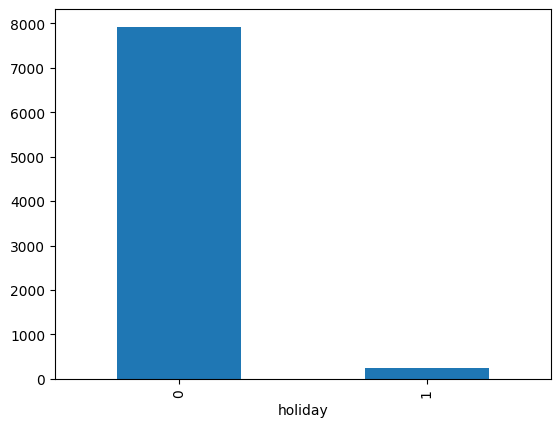

In [ ]:
train_data.groupby("holiday").size().plot.bar()


count_holiday = len(train_data[train_data['holiday'] == 1])
print(f"Number of samples with value 1 in holiday feature: {count_holiday}")

train_data.groupby("holiday").size()/train_data.count()["holiday"]

As evident, only 3 percent of the dataset comprises holiday observations, indicating a significant imbalance. We aim to investigate whether days categorized as holidays exhibit a distinctive impact on the average bicycle rental when compared to regular days.

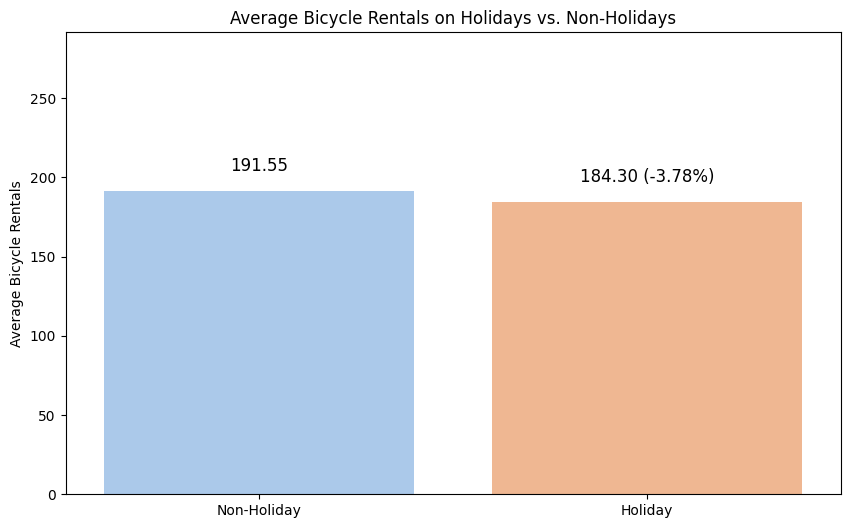

In [ ]:
avg_rentals_holiday = train_data[train_data['holiday'] == 1]['count'].mean()
avg_rentals_non_holiday = train_data[train_data['holiday'] == 0]['count'].mean()

# Calculate the percentage of rentals on holidays compared to non-holidays
percentage_difference = ((avg_rentals_holiday - avg_rentals_non_holiday) / avg_rentals_non_holiday) * 100

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['Non-Holiday', 'Holiday'], y=[avg_rentals_non_holiday, avg_rentals_holiday], palette='pastel')
plt.title('Average Bicycle Rentals on Holidays vs. Non-Holidays')
plt.ylabel('Average Bicycle Rentals')
plt.ylim(0, max(avg_rentals_non_holiday, avg_rentals_holiday) + 100)  # Adjust y-axis limit for better visualization

# Annotate with percentages
plt.text(0, avg_rentals_non_holiday + 10, f"{avg_rentals_non_holiday:.2f}", ha='center', va='bottom', fontsize=12)
plt.text(1, avg_rentals_holiday + 10, f"{avg_rentals_holiday:.2f} ({percentage_difference:.2f}%)", ha='center', va='bottom', fontsize=12)

plt.show()

The average bicycle rentals on holidays and non-holidays differ by just 6 percent. Considering the imbalanced nature of the data with respect to the 'holiday' variable, we have decided, at this stage, to exclude the 'holiday' variable from further analysis.

In [ ]:
features_to_remove = append_to_features_to_remove(features_to_remove, ['holiday'])

### Workingday

<Figure size 1200x800 with 0 Axes>

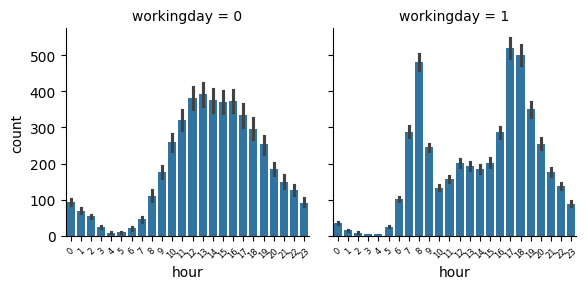

In [ ]:
plt.figure(figsize=(12,8))
d = sns.FacetGrid(train_data, col="workingday")
d. map(sns.barplot, "hour", "count")

d.set_xticklabels(rotation=45, fontsize=6)

We aimed to analyze the distribution of bicycle rental quantities on workdays compared to non-work days. It's fascinating to observe peaks in bike rentals during the morning and evening hours on workdays, aligning with typical arrival and departure times from the office. It implies to us that the 'hour' feature may be significant to the target.

## Exploring Ordinal Features

In our dataset, we have three ordinal variables:'weather,' 'season,' and 'traffic'— that we aim to examine. Our goal is to explore the distribution of observations across each category within these variables and to gain insights into how each level is associated with the label.


### Season

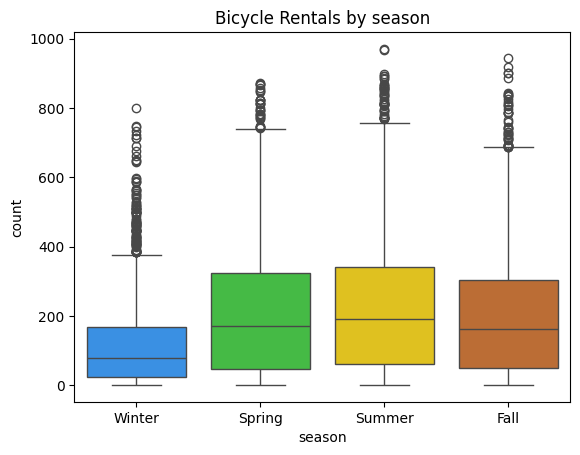

         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2007.0  117.083209  125.153714  1.0  24.0   78.0  167.5  801.0
2       2051.0  215.464164  193.317717  1.0  48.0  172.0  325.0  873.0
3       2039.0  230.103973  195.050058  1.0  62.5  192.0  342.0  970.0
4       2067.0  201.264151  179.754280  1.0  49.0  161.0  304.0  943.0


In [ ]:
season_colors = {'Winter': 'dodgerblue', 'Spring': 'limegreen', 'Summer': 'gold', 'Fall': 'chocolate'}

sns.boxplot(x='season', y='count', data=train_data, palette=season_colors.values())
plt.title('Bicycle Rentals by season')
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])  # Adding labels to the x-axis
plt.show()

# Summary statistics
summary_stats = train_data.groupby('season')['count'].describe()
print(summary_stats)

As expected, the summer season emerges as the most favorable period for bike rentals, with the highest average rentals. The enchanting autumn seasons follow closely in 2nd and 3rd place. Notably, winter lags significantly behind, aligning with the anticipation of lower bike rentals during colder months.

### Weather

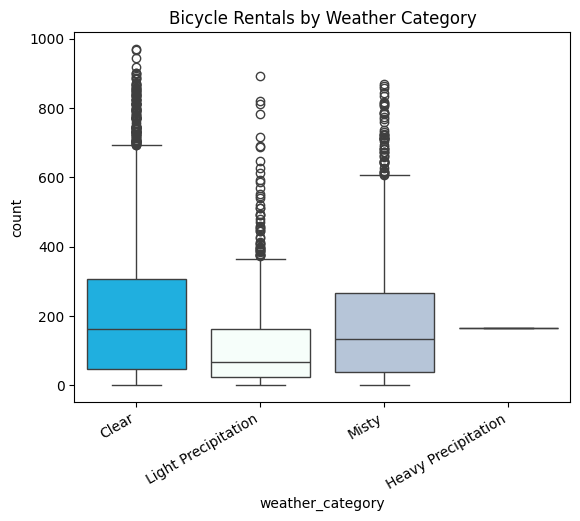

          count        mean         std    min     25%    50%    75%    max
weather                                                                    
1        5406.0  205.080281  187.605954    1.0   48.00  161.0  306.0  970.0
2        2125.0  177.567529  167.984100    1.0   38.00  133.0  265.0  868.0
3         632.0  120.156646  143.830832    1.0   22.75   68.0  162.0  891.0
4           1.0  164.000000         NaN  164.0  164.00  164.0  164.0  164.0


In [ ]:
# Define a mapping from numerical levels to general names
weather_mapping = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light Precipitation',
    4: 'Heavy Precipitation'
}

# Create a new column 'weather_category' with general names
train_data_to_plot = train_data.copy()
train_data_to_plot['weather_category'] = train_data_to_plot['weather'].map(weather_mapping)

# Define colors for each weather category
weather_colors = {
    'Clear': 'deepskyblue',
    'Misty': 'mintcream',
    'Light Precipitation': 'lightsteelblue',
    'Heavy Precipitation': 'dimgrey'
}

# Box plot with the new general names and custom colors
sns.boxplot(x='weather_category', y='count', data=train_data_to_plot, palette=weather_colors.values())
plt.title('Bicycle Rentals by Weather Category')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Summary statistics
summary_stats = train_data_to_plot.groupby('weather')['count'].describe()
print(summary_stats)

As expected, both in the 'season' and 'weather' variables, we observe that on days with milder weather conditions, the average bicycle rental tends to be higher. Conversely, extreme weather conditions are rare, with only one observation in our dataset. Let's reexamine this pattern for further insights.

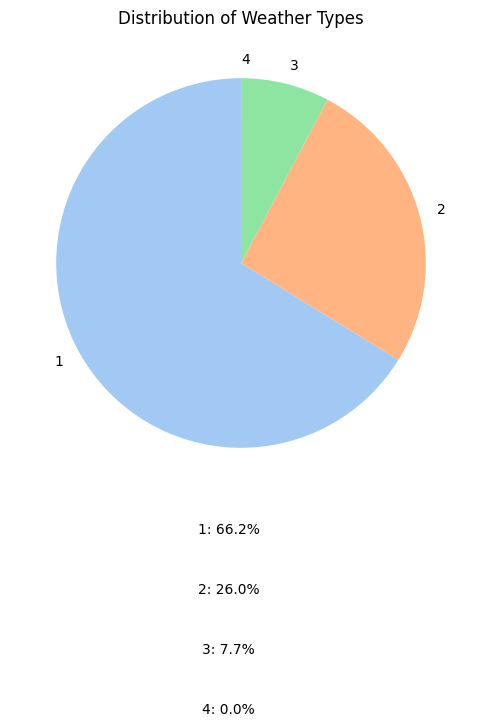

In [ ]:
# Count of observations for each type of weather
weather_counts = train_data_to_plot['weather'].value_counts()

# Percentage of each type of weather from the total data
weather_percentages = (weather_counts / len(train_data)) * 100

# Create a DataFrame for plotting
weather_plot_data = pd.DataFrame({
    'Weather Type': weather_counts.index,
    'Count': weather_counts.values,
    'Percentage': weather_percentages.values
})

# Set a color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(weather_plot_data)]

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(weather_plot_data['Count'], labels=weather_plot_data['Weather Type'], autopct='', colors=colors, startangle=90)
plt.title('Distribution of Weather Types')

# Display percentages below the pie chart
for i, (weather_type, percentage) in enumerate(zip(weather_plot_data['Weather Type'], weather_plot_data['Percentage'])):
    plt.figtext(0.5, 0.05 - 0.1 * i, f'{weather_type}: {percentage:.1f}%', ha='center', va='center', fontsize=10)

plt.show()

As you can see, the number of observations of bike rental in particularly stormy weather ('4') tends to zero. Therefore we will decide to get rid of these observations during the project

In [ ]:
def pre_process_remove_weather_four(data):
  data = data[data['weather'] != 4]

  return data

### Traffic

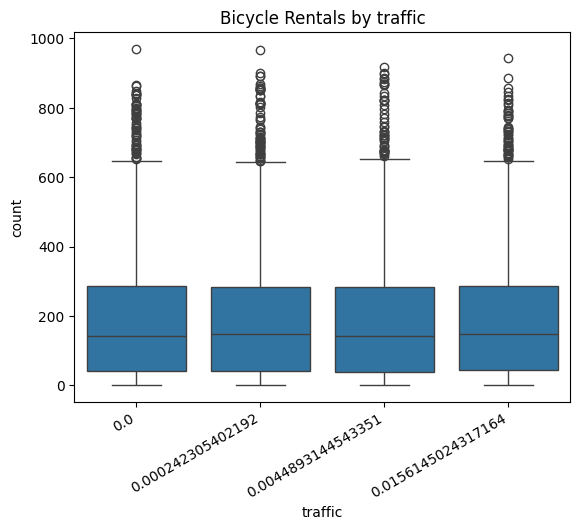

           count        mean         std  min   25%    50%     75%    max
traffic                                                                  
0.000000  2090.0  190.836842  181.982192  1.0  42.0  143.0  284.75  970.0
0.000242  2088.0  191.784004  182.033003  1.0  42.0  146.5  283.00  968.0
0.004489  1981.0  189.038364  179.302621  1.0  38.0  141.0  284.00  917.0
0.015615  2005.0  193.675312  181.251617  1.0  45.0  147.0  287.00  943.0


In [ ]:
sns.boxplot(x='traffic', y='count', data=train_data)
plt.title('Bicycle Rentals by traffic')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Summary statistics
summary_stats = train_data.groupby('traffic')['count'].describe()
print(summary_stats)

The distribution of observations appears nearly uniform across various levels of traffic. Moreover, there is no substantial difference in the average bike rentals among these levels.

### Weekday

Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

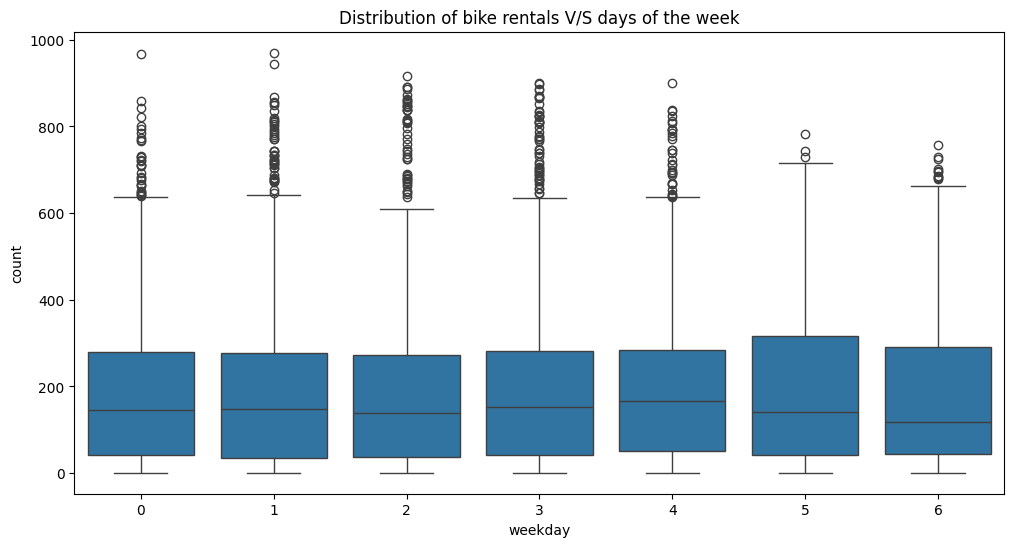

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='count', data=train_data)
plt.title('Distribution of bike rentals V/S days of the week')

We didn't notify any significant results in the 'weekday' feature. We'll leave it as it is.

### Month

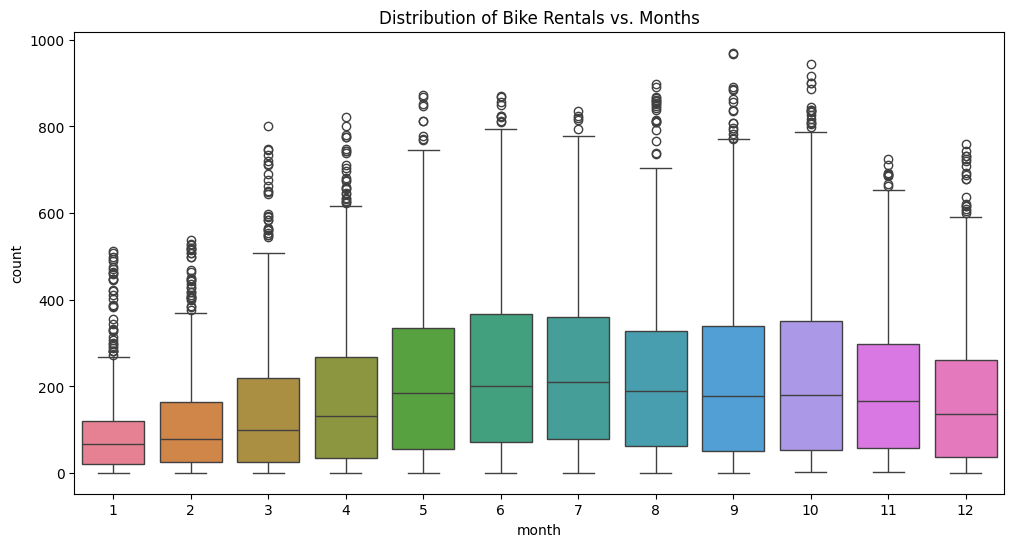

In [ ]:
color_palette = sns.color_palette("husl", n_colors=len(train_data['month'].unique()))

# Create a boxplot with the specified palette
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='count', data=train_data, palette=color_palette)
plt.title('Distribution of Bike Rentals vs. Months')
plt.show()

The graph above illustrates that the average bicycle rental increases during the spring and summer months, which aligns logically with the milder weather experienced in these periods.

## Exploring Numerical Features

### Temp

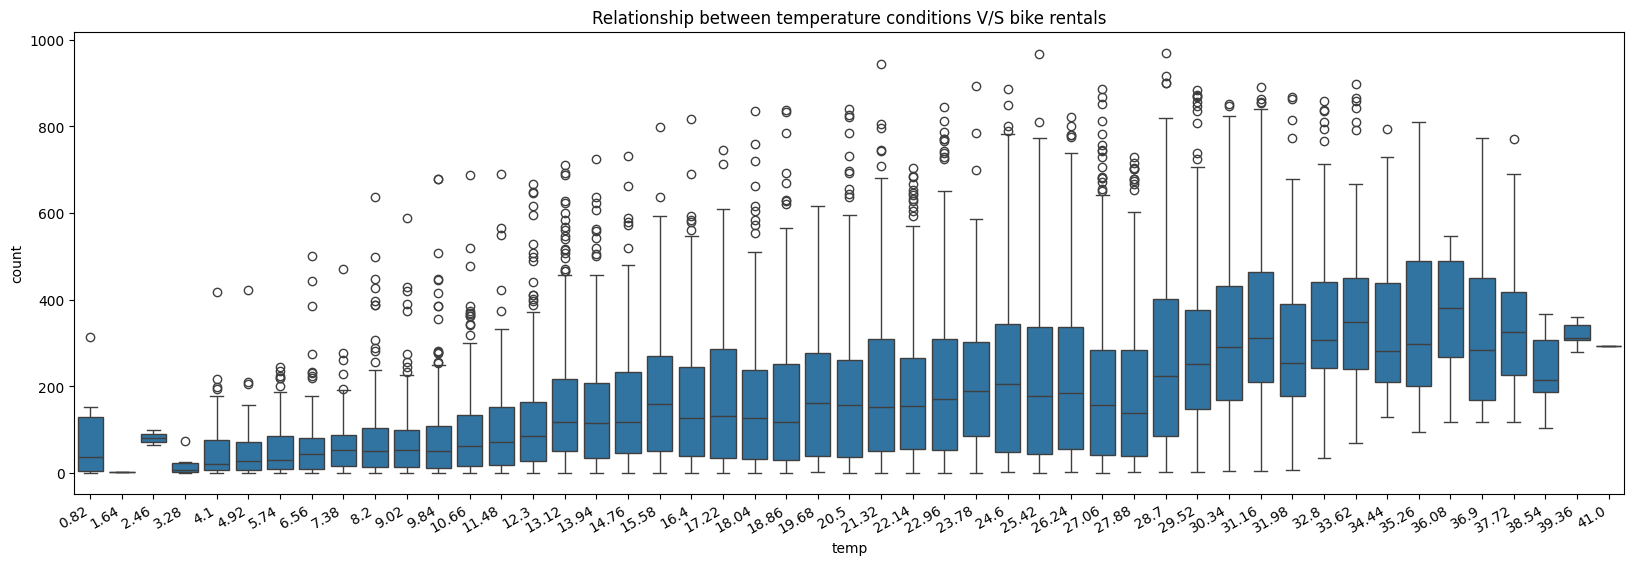

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x='temp', y='count', data=train_data)
plt.title('Relationship between temperature conditions V/S bike rentals')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.show()

It's beautiful to observe the correlation between temperature and bike rentals. As expected, the more convenient the temperature, the higher the number of rented bikes. This indicates that temperature is a significant feature influencing bike rental patterns.

## Correlation Heatmap


<Axes: title={'center': 'Pearson Correlation Heatmap'}>

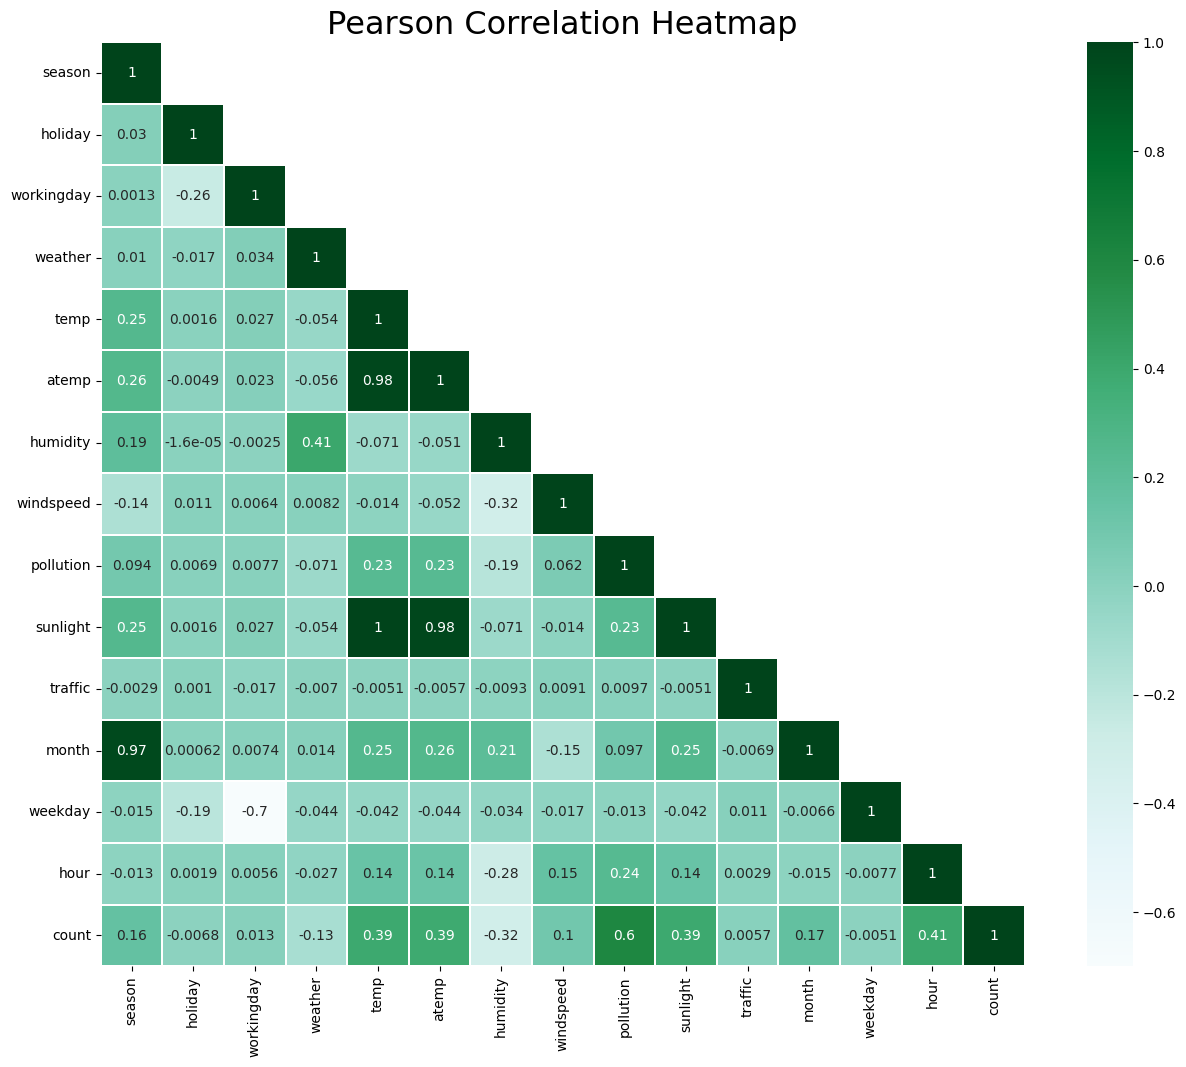

In [ ]:
corr_df = train_data.corr()
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(corr_df, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

Conclusions from the correlation heatmap:
1. We observe an extremely high correlation among three features - atemp, temp, and sunlight. This correlation is sensible based on our knowledge of these features; sunlight influences temperature, which, in turn, affects the average temperature. Additionally, all three features demonstrate the same correlation with the target variable ('count'). Consequently, we can keep only one of these features, and our choice is atemp.
2. We observe an extremely high correlation between the 'month' and 'season' features, which aligns with our expectations. In light of this correlation, it is reasonable to drop the 'month' feature and retain only the 'season' feature, as it essentially conveys similar information.

In [ ]:
features_to_remove = append_to_features_to_remove(features_to_remove, ['sunlight', 'temp', 'month'])
print(features_to_remove)

['datetime', 'holiday', 'sunlight', 'temp', 'month']


## Count of Unique Values for Each Feature <br>
The code below is used to calculate the count of unique values for each feature in the train_data DataFrame. This helps us understand the variability and distinctness of values in each column.

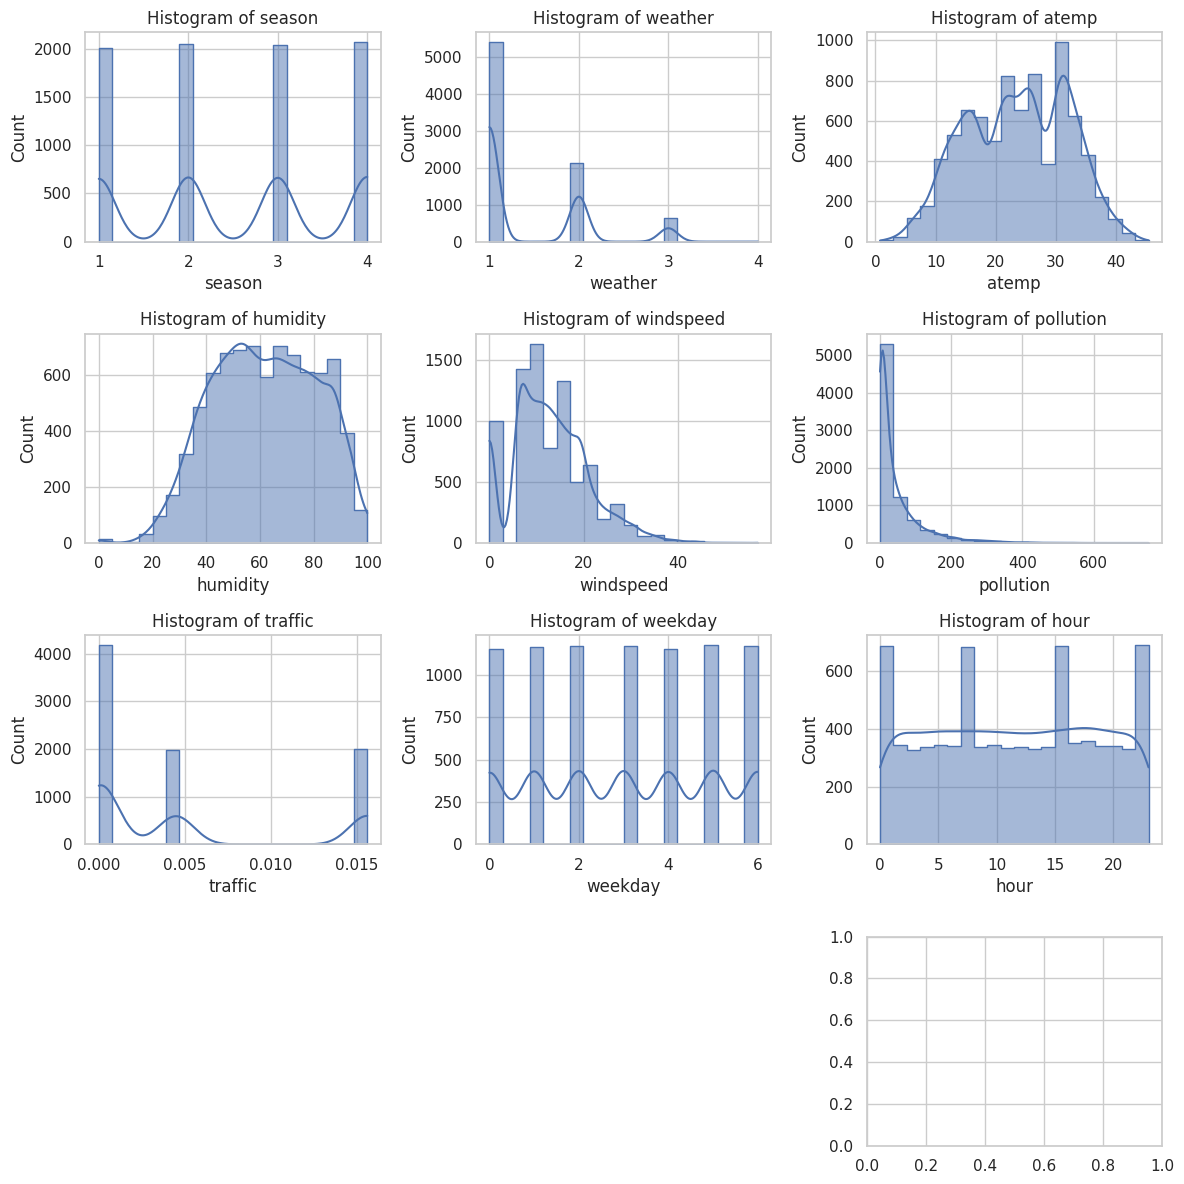

In [ ]:
# Combine all features to remove
remove = features_to_remove + binary_features + ['datetime']

selected_columns = [col for col in train_data.columns if col not in remove]

# Create a new DataFrame with selected columns
selected_data = train_data[selected_columns]

# Use seaborn for more visually appealing histograms
sns.set(style="whitegrid")

# Define the number of columns for subplots
num_cols = 3

# Calculate the number of rows needed based on the number of selected features
num_rows = -(-len(selected_columns) // num_cols)  # Round up the division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for each selected feature
for i, feature in enumerate(selected_columns):
    sns.histplot(data=selected_data, x=feature, bins=20, kde=True, palette="viridis", element="step", common_norm=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')

# Remove empty subplots if any
if len(selected_columns) % num_cols != 0:
    for j in range(len(selected_columns) % num_cols, num_cols):
        fig.delaxes(axes[-j - 1])

plt.tight_layout()
plt.show()

The 'atemp' feature appears to closely resemble a normal distribution, allowing us to assume normality for convenience. Moving forward, we aim to delve deeper into the distribution of 'pollution' and 'windspeed,' with the objective of normalizing their distributions.

In [ ]:
features_to_explore = ['windspeed','pollution']
data_to_explore = train_data[features_to_explore]

We want to try to set a threshold as the upper limit of the one big bar we saw in the histograms plots of these features. as we think that most of the interesting data is there.
Let's try to set this threshold, count the values above it, and plot the values under it, for each one of the features:

In [ ]:
data_to_explore.describe()

,windspeed,pollution
count,8164.000000,8164.000000
mean,12.791334,47.152120
std,8.213914,72.882602
min,0.000000,0.000304
25%,7.001500,3.693188
50%,12.998000,17.684113
75%,16.997900,59.257746
max,56.996900,754.304876


The 95th percentile value of windspeed is: 27.9993


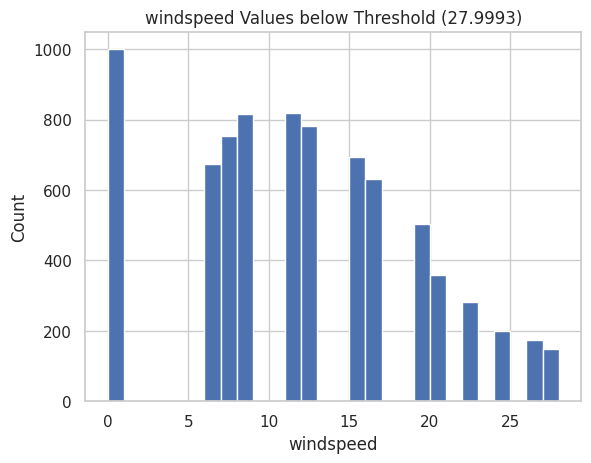

values above threshold: windspeed  pollution 
30.0026    0.033716      1
32.9975    213.589638    1
35.0008    3.618208      1
           3.257404      1
           3.149690      1
                        ..
31.0009    15.662609     1
           14.333232     1
           12.038556     1
           10.511799     1
56.9969    54.877070     1
Length: 325, dtype: int64
The 95th percentile value of pollution is: 193.76997480564242


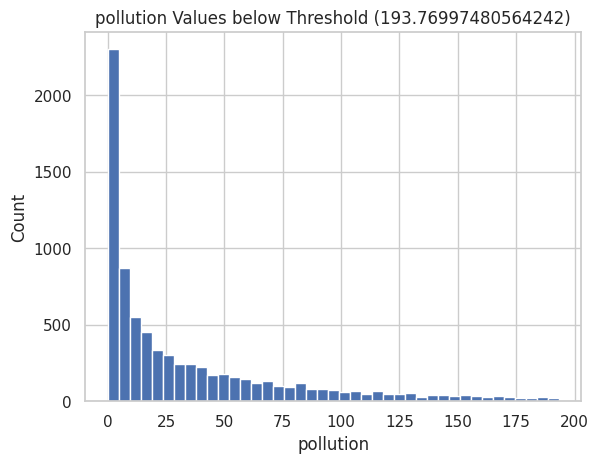

values above threshold: windspeed  pollution 
0.0000     194.404452    1
16.9979    276.470730    1
           564.007638    1
           483.170187    1
           478.318359    1
                        ..
11.0014    233.007970    1
           224.764795    1
           219.935498    1
           216.745389    1
35.0008    396.812439    1
Length: 409, dtype: int64


In [ ]:
# Calculate the 95th percentile for each feature
percentiles = data_to_explore.quantile(0.95)

# Print the 95th percentile values
for feature, threshold in percentiles.items():
    print(f"The 95th percentile value of {feature} is: {threshold}")


    # Plot the values below the threshold
    values_below_threshold = data_to_explore[data_to_explore[feature] <= threshold]
    plt.hist(values_below_threshold[feature], bins='auto')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Values below Threshold ({threshold})')
    plt.show()

    # Count the values above threshold:
    print(f'values above threshold: {data_to_explore[data_to_explore[feature] > threshold].value_counts()}')

All the plots looks like a Log-Normal Distribution. <br>
The log normal distribution may seem similar to the normal distribution but it has a few catches:

- It’s skewed to the right, meaning it has a positive fat-tail.
- It only contains positive values.

And it's exactly what we see here!

let's try to plot the log-transfrom features until the 95 percentile:

We observed that the features are now closely resemble a normal distribution after transformation (although not exact, we assume they are). As we prefer working with features that exhibit a normal distribution, it facilitates outlier reduction and offers advantages for future analysis. Consequently, we transformed all features that exhibited a similar normal distribution after the transformation.

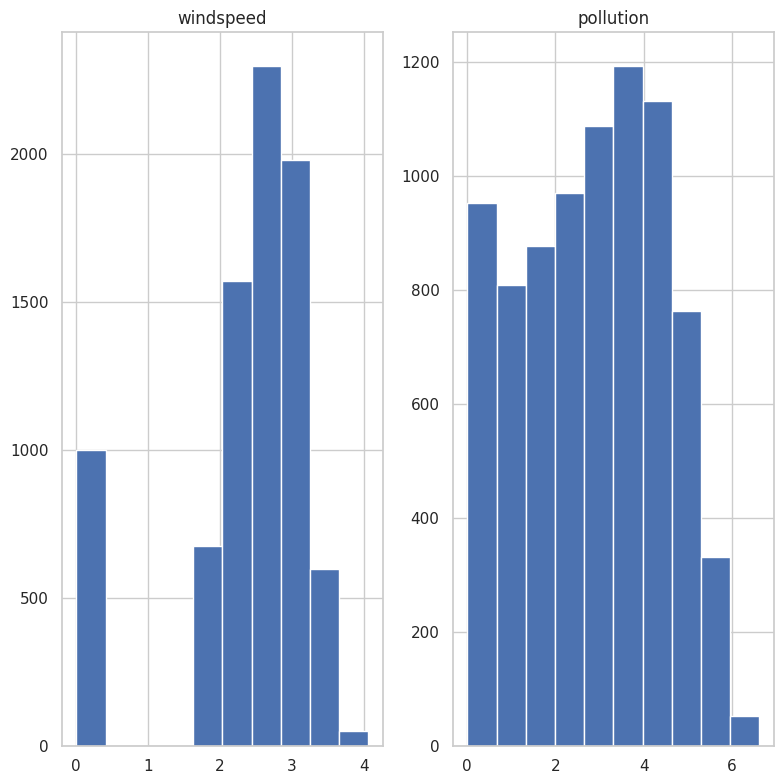

In [ ]:
# Apply feature transformation techniques to spread out the values
transformed_data = np.log1p(train_data[features_to_explore])  # Apply log transformation to the features
transformed_data.hist(figsize=(8, 8))  # Plot the histograms of transformed features
plt.tight_layout()
plt.show()

In [ ]:
# Select the features you want to transform to log scale
features_scale_to_log = ['pollution','windspeed']

def pre_process_apply_log_transformation(data, features, is_test):
    data_copy = data.copy()

    count = data_copy['count']
    data_copy.drop(columns='count', inplace=True)

    for feature in features:
        transformed_feature = np.log1p(data_copy[feature]) # Use np.log() for natural logarithm
        data_copy[feature + '_logscale'] = transformed_feature
        data_copy = data_copy.drop(columns=feature)

    data_copy['count'] = count

    return data_copy

# Implementing the preprocessing on the test data

Upon conducting research and gaining insights into the topic, we made a significant realization.<br>
When it comes to imputing values in the test data, relying solely on the test data's statistics (such as mean, median, or mode) is not viable.<br>
This limitation stems from the test data potentially having a small sample size, making it unreliable for learning purposes. Therefore, we devised an alternative approach to address this challenge.<br>
To tackle this issue, we adopted a two-fold implementation process: one for training data and another for test data. During the training implementation, we stored the desired statistics for each function in a dictionary. These calculated statistics serve as valuable references for imputing missing data in the test (and validation) implementation.

In [ ]:
def implementing_pre_process(data, is_not_train = True):
    if (is_not_train): ## If it's not the train data that already converted the 'datetime' feature
      data = pre_process_convert_datetime(data)
    final_data = data.drop(columns=features_to_remove, inplace=False).copy()
    final_data = pre_process_remove_weather_four(final_data)
    final_data = pre_process_apply_log_transformation(final_data,features_scale_to_log, is_not_train)

    return final_data

In [ ]:
final_train_data = implementing_pre_process(train_data, False)

X_train, y_train = final_train_data.values[:,:-1], final_train_data.values[:, -1]

print(X_train.shape, y_train.shape)

(8163, 10) (8163,)


In [ ]:
final_test_data = implementing_pre_process(test_data, True)

X_test, y_test = final_test_data.values[:,:-1], final_test_data.values[:, -1]

print(X_test, y_test)

[[ 3.          1.          1.         ... 11.          2.4263078
   0.        ]
 [ 1.          0.          1.         ...  6.          1.50456821
   1.94636719]
 [ 4.          0.          1.         ... 18.          3.29383171
   2.63891446]
 ...
 [ 3.          1.          1.         ...  5.          0.73010457
   2.30239507]
 [ 3.          0.          1.         ...  8.          1.1913696
   2.48502331]
 [ 1.          0.          1.         ... 12.          2.29658729
   2.99579227]] [127.  13. 163. ...  26. 127.  84.]


In [ ]:
print(final_train_data)

      season  workingday  weather   atemp  humidity   traffic  weekday  hour  \
0          3           1        1  32.575        65  0.000000        0     0   
1          2           1        1  26.515        52  0.004489        4    22   
2          2           1        1  15.910        61  0.000242        4    23   
3          3           0        1  27.275        60  0.004489        6     9   
4          1           1        3   9.850        93  0.000000        1    23   
...      ...         ...      ...     ...       ...       ...      ...   ...   
8159       1           0        1   8.335        47  0.004489        5     2   
8160       4           0        1  12.880        61  0.000000        5     9   
8161       4           0        1  13.635        48  0.015615        6    16   
8162       1           0        1  19.695        17  0.000242        5     7   
8163       2           1        2  25.760        88  0.015615        2     7   

      pollution_logscale  windspeed_log

In [ ]:
print(final_test_data)

      season  workingday  weather   atemp  humidity   traffic  weekday  hour  \
0          3           1        1  40.150        59  0.015615        1    11   
1          1           0        1   6.820        54  0.004489        0     6   
2          4           0        1  11.365        48  0.000000        6    18   
3          3           1        2  34.090        62  0.004489        2    10   
4          2           1        1  31.060        53  0.015615        4    23   
...      ...         ...      ...     ...       ...       ...      ...   ...   
2717       1           0        1  24.240        29  0.000242        5    15   
2718       1           0        1  20.455        37  0.000000        6    16   
2719       3           1        1  31.060        74  0.015615        0     5   
2720       3           0        1  31.060        65  0.004489        5     8   
2721       1           0        1  21.210        77  0.015615        5    12   

      pollution_logscale  windspeed_log

# Building the models

## Linear Regression

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## Random Forest

In [ ]:
rf = RandomForestRegressor(random_state= 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Wow, that is quite an overwhelming list! How do we know where to start? we read documentation on the random forest in Scikit-Learn. This told us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). <br>
We could go read the research papers on the random forest and try to theorize the best hyperparameters, but a more efficient use of our time is just to try out a wide range of values and see what works! We will try adjusting the following set of hyperparameters: <br>
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

Given the large number of possible combinations of hyperparameter settings (5 * 4 * 3 * 3 * 3 * 2 = 1080), conducting a grid search would require extensive computation time. To overcome this challenge, we opted for a more efficient approach called random search. <br>

Random search selects parameter values at random, allowing us to sample a diverse range of combinations without exhaustively testing every possibility. While it may not guarantee the absolute best parameter combination, it provides a good enough result by exploring a wide range of values. This approach significantly reduces the computational burden associated with grid search, making it a practical choice for our scenario.

In [ ]:
def choose_rf_best_params(X, y):
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation,
    # search across 50 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X, y)

    return rf_random.best_params_

In [ ]:
rf_best_params_random = choose_rf_best_params(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
print(rf_best_params_random)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}


## XGBoost

In [ ]:
# Create an initial XGBoost regressor model
xgb_model = XGBRegressor(random_state=42)

In [ ]:
# Define the hyperparameters and their possible values to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
xg_best_params = grid_search.best_params_
print(f'Best Hyperparameters: {xg_best_params}')

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}


# Model Evaluation

In [ ]:
ALLOWED = ['LinearRegression', 'RandomForest', 'XgBoost', 'ALL']

ALGORITHMS = {
    'RandomForest': RandomForestRegressor(**rf_best_params_random),
    'LinearRegression': LinearRegression(),
    'XgBoost': XGBRegressor(**xg_best_params)
}

In [ ]:
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
def k_fold_cross_validation(model, X, y, k=5):
    """
    Perform k-fold cross-validation for a given model.

    Parameters:
    - model: The machine learning model
    - X: Features
    - y: Target variable
    - k: Number of folds for cross-validation

    Returns:
    - Array of RMSE scores for each fold
    """
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    rmse_scorer = make_scorer(calculate_rmse, greater_is_better=False)
    scores = -cross_val_score(model, X, y, cv=cv, scoring=rmse_scorer)
    return scores

In [ ]:
import time

def model_evaluation(model_name, train_data, X_test, y_train, y_test, use_cross_validation=True, k_folds=5):
    if model_name not in ALLOWED:
        raise ValueError(f"Invalid model name. Choose one of {ALLOWED}")

    if model_name == 'ALL':
        models_to_evaluate = ALGORITHMS.keys()
    else:
        models_to_evaluate = [model_name]

    scores = {}
    runtimes = {}  # Dictionary to store runtime for each model

    for model_name in models_to_evaluate:
        model = ALGORITHMS[model_name]

        # Start timing
        start_time = time.time()

        model.fit(train_data, y_train)
        y_pred = model.predict(X_test)
        rmse = calculate_rmse(y_test, y_pred)
        scores[model_name] = rmse

        # Stop timing
        end_time = time.time()

        # Calculate runtime in seconds
        runtime = end_time - start_time
        runtimes[model_name] = runtime

        print(f"{model_name} RMSE: {rmse}")
        print(f"{model_name} Runtime: {runtime:.2f} seconds")

        if use_cross_validation:
            # Perform k-fold cross-validation
            cv_scores = k_fold_cross_validation(model, train_data, y_train, k=k_folds)
            avg_cv_rmse = np.mean(cv_scores)
            print(f"{model_name} Cross-Validation RMSE (average): {avg_cv_rmse}")

        # Optional: Plot predictions vs actual values for better visualization
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.title(f"{model_name} - Predictions vs Actual")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.show()

    # Return the winning model (model with the lowest RMSE)
    winning_model = min(scores, key=scores.get)
    print(f"The winning model is {winning_model} with an RMSE of {scores[winning_model]}")

    return winning_model, scores, runtimes

RandomForest RMSE: 69.47037944239675
RandomForest Runtime: 10.59 seconds
RandomForest Cross-Validation RMSE (average): 73.44934176885785


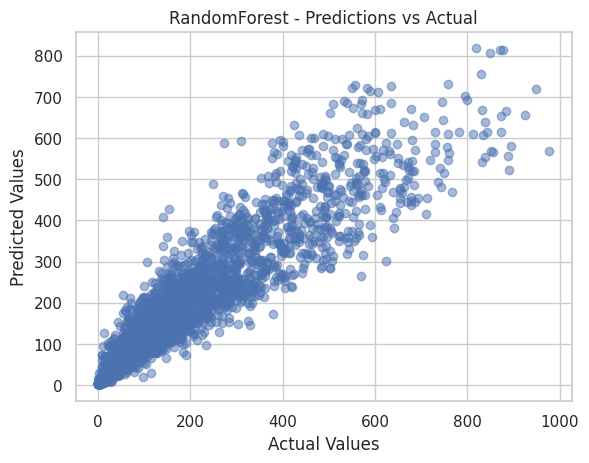

LinearRegression RMSE: 126.83136623075181
LinearRegression Runtime: 0.01 seconds
LinearRegression Cross-Validation RMSE (average): 129.31352924244996


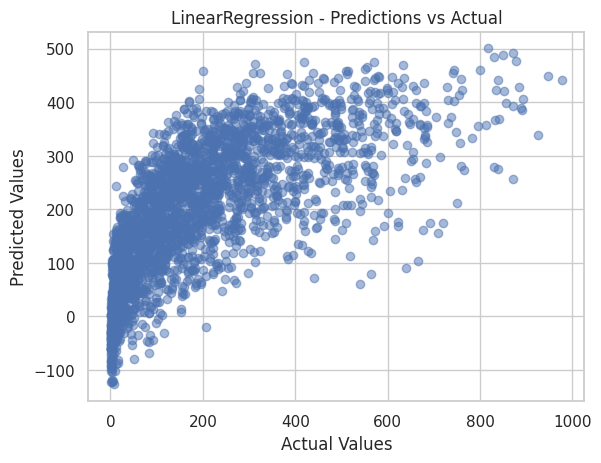

XgBoost RMSE: 63.482588068214
XgBoost Runtime: 0.26 seconds
XgBoost Cross-Validation RMSE (average): 67.50195374924688


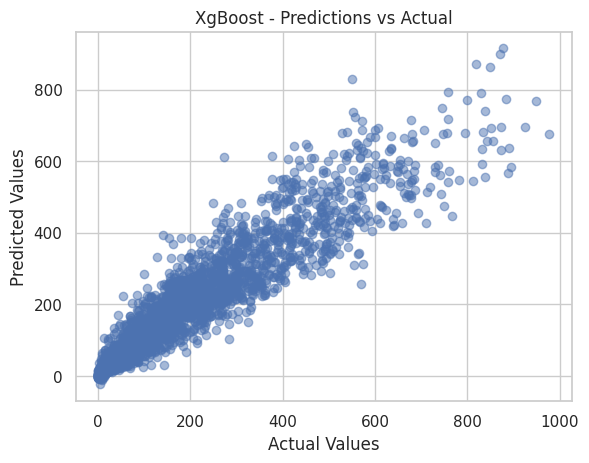

The winning model is XgBoost with an RMSE of 63.482588068214


In [ ]:
winning_model, scores, runtimes = model_evaluation('ALL', X_train, X_test, y_train, y_test)

### Feature Importance Analysis:

After Finding that our best model is the XG Boost Model, we wanted to analize the feature importance in this model and try to understand which features are the most imprtant for us:

In [ ]:
def plot_feature_importance(model, model_name, train_data, feature_names=None):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure()
    title = model_name + "" + " Feature Importances"
    plt.title(title)
    plt.bar(range(train_data.shape[1]), importances[indices], align="center")
    plt.xticks(range(train_data.shape[1]), sorted_feature_names, rotation=90)
    plt.tight_layout()
    plt.show()
    top_indices = np.argsort(importances)[::-1][:]
    top_three_features = []

    # Print the contribution of each top feature
    print("Top {model_name} Features Contributions:")
    for i, feature_index in enumerate(top_indices):
        feature_name = sorted_feature_names[i]
        importance = importances[feature_index]
        print(f"{feature_name}: {importance:.4f}")
        if i<3:
          top_three_features.append(feature_name)

    return top_indices, top_three_features

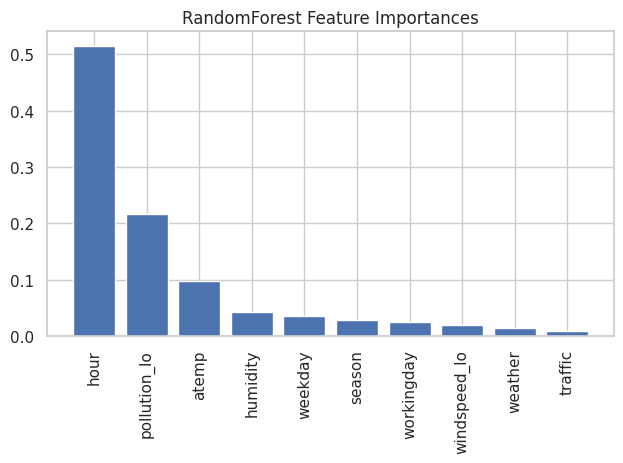

Top {model_name} Features Contributions:
hour: 0.5151
pollution_lo: 0.2168
atemp: 0.0967
humidity: 0.0418
weekday: 0.0352
season: 0.0277
workingday: 0.0242
windspeed_lo: 0.0202
weather: 0.0134
traffic: 0.0090


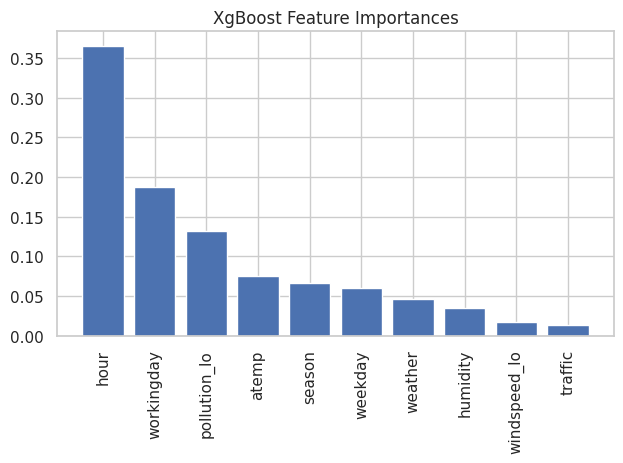

Top {model_name} Features Contributions:
hour: 0.3652
workingday: 0.1870
pollution_lo: 0.1325
atemp: 0.0749
season: 0.0673
weekday: 0.0606
weather: 0.0466
humidity: 0.0354
windspeed_lo: 0.0172
traffic: 0.0133


In [ ]:
models_to_evaluate = ALGORITHMS.keys()
models_dict = {}

for model_name in models_to_evaluate:
  if model_name == 'LinearRegression':
    continue
  feature_names = [name[:12] for name in final_train_data.columns.tolist()]
  top_indices, top_three_features = plot_feature_importance(ALGORITHMS[model_name],model_name, X_train, feature_names)

  string = model_name+""+"_best_3"
  models_dict[string] = top_three_features


# CSV submitting file creation

In [ ]:
added_features = ['month', 'weekday', 'hour']

In [ ]:
results = {'model': ['Random Forest', 'Linear Regression', 'XGBoost'],
           'Score (RMSE)': [scores['RandomForest'], scores['LinearRegression'], scores['XgBoost']],
           'Hyperparams used': [[rf_best_params_random], [''], xg_best_params],
           'Features dropped': [features_to_remove, features_to_remove, features_to_remove],
           'New features created': [added_features, added_features, added_features],
           'Runtime trainining + inference (seconds)': [runtimes['RandomForest'], runtimes['LinearRegression'], runtimes['XgBoost']],
           'Hardware used (GPU/CPU/TPU)': ['GPU', 'GPU', 'GPU'],
           'Explainability (top 3 features)':[models_dict['RandomForest_best_3'], ['None'], models_dict['XgBoost_best_3']]
           }

df_for_csv = pd.DataFrame(results)
df_for_csv

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Random Forest,69.470379,"[{'n_estimators': 400, 'min_samples_split': 2,...","[datetime, holiday, sunlight, temp, month]","[month, weekday, hour]",10.585351,GPU,"[hour, pollution_lo, atemp]"
1,Linear Regression,126.831366,[],"[datetime, holiday, sunlight, temp, month]","[month, weekday, hour]",0.014077,GPU,[None]
2,XGBoost,63.482588,"{'colsample_bytree': 0.8, 'learning_rate': 0.1...","[datetime, holiday, sunlight, temp, month]","[month, weekday, hour]",0.260197,GPU,"[hour, workingday, pollution_lo]"


In [ ]:
csv_path = '/content/drive/My Drive/Colab Notebooks/Machine learning/Assignments/Assignment_1/exercise1.csv.csv'

# Save the DataFrame to a CSV file
df_for_csv.to_csv(csv_path, index=False)

# Display the saved DataFrame
